# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

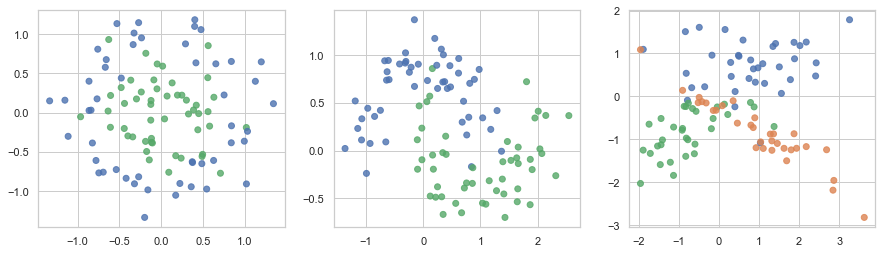

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

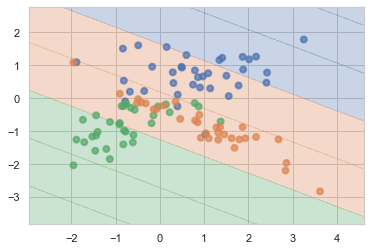

In [26]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def fit_trees(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    plot_surface(dtc, X_train, y_train)

    y_pred_tr = dtc.predict(X_train)
    y_pred_test = dtc.predict(X_test)
    score_train = accuracy_score(y_train, y_pred_tr)
    score_test = accuracy_score(y_test, y_pred_test)
    print(f'Train accuracy: {score_train}')
    print(f'Test accuracy: {score_test}')

Train accuracy: 1.0
Test accuracy: 0.7


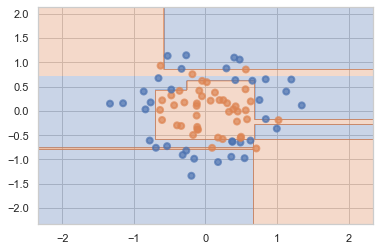

In [23]:
fit_trees(datasets[0][0], datasets[0][1])

Train accuracy: 1.0
Test accuracy: 0.95


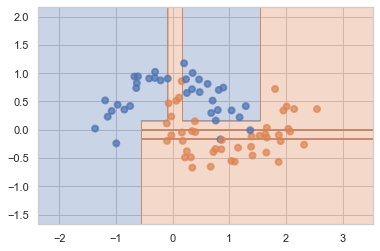

In [24]:
fit_trees(datasets[1][0], datasets[1][1])

Train accuracy: 1.0
Test accuracy: 0.7


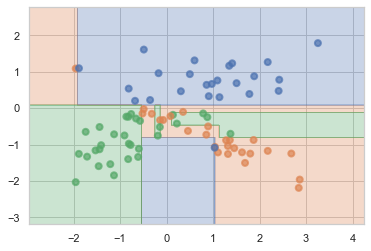

In [25]:
fit_trees(datasets[2][0], datasets[2][1])

__Ответ:__ Я думаю, что деревья сильно переобучились, так как на train их accuracy 1, а на test не прям сильно хорошая. Если посмотреть на графики, то видно, что деревья сильно подгоняются под выборку

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [32]:
def acc(dtc, X, y):
    y_pred = dtc.predict(X)
    score = accuracy_score(y, y_pred)
    return score
    

In [ ]:
depths = np.arange(1, 10)
cnt_leafs = np.arange(1, 20)
all_best_params = {}
fig = plt.figure(figsize=(10, 10)) 
for i in range(len(datasets)):
    X, y = datasets[i][0], datasets[i][1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    
    best_params = {
        'max_depth': 0,
        'min_samples_leaf': 0,
        'train_acc': 0,
        'val_acc': 0,
        'test_acc': 0
    }
    
    for max_depth in depths:
        for min_samples_leaf in cnt_leafs:
            dtc = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
            dtc.fit(X_train, y_train)
            plot_surface(dtc, X_train, y_train)
            plt.show() 
            train_score = acc(dtc, X_train, y_train)
            val_score = acc(dtc, X_val, y_val)
            test_score = acc(dtc, X_test, y_test)
            print(f'For max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}')
            print(f'Train accuracy: {train_score}')
            print(f'Val accuracy: {val_score}')
            print(f'Test accuracy: {test_score}')
            print('----------')
            if val_score > best_params['val_acc']:
                best_params['max_depth'] = max_depth
                best_params['min_samples_leaf'] = min_samples_leaf
                best_params['train_acc'] = train_score
                best_params['val_acc'] = val_score
                best_params['test_acc'] = test_score
                
    

    if i!=2:
        print('NEXT DATASET')
        print('-----------------------------------')
        print('-----------------------------------')
        print('-----------------------------------')

    
    all_best_params[i] = best_params     



            
        


In [52]:
all_best_params

{0: {'max_depth': 3,
  'min_samples_leaf': 1,
  'train_acc': 0.875,
  'val_acc': 0.75,
  'test_acc': 0.85},
 1: {'max_depth': 5,
  'min_samples_leaf': 3,
  'train_acc': 0.9642857142857143,
  'val_acc': 0.875,
  'test_acc': 0.95},
 2: {'max_depth': 2,
  'min_samples_leaf': 1,
  'train_acc': 0.875,
  'val_acc': 0.9583333333333334,
  'test_acc': 0.75}}

__Ответ:__ Качество удалось повысить на первом (было 0.7 стало 0.85) и последнем (было 0.7 стало 0.75) датасетах. Почти везде мы получили неглубокие деревья, что означает, отсутсвие сильного переобучения. Поэтому обобщающая способность стала лучше. На втором датасете дерево поглубже, относительно других. Разделяющая поверхность на каждом датасете меняется по-разному.  На первом датасете можно сказать, что есть вырезанный прямогульник. На втором датасете разбиение чуть по тяжлее, там две вырезанные зоны. На последнем датасете разбиение, как и на первом не сложное. Просто одна горизонтальная пряма и одна вертикальная (3 класса)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/101249506/

Ник в контесте: tanigmatzyanov@edu.hse.ru

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [2]:
import pandas as pd
from hw5code import find_best_split

df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


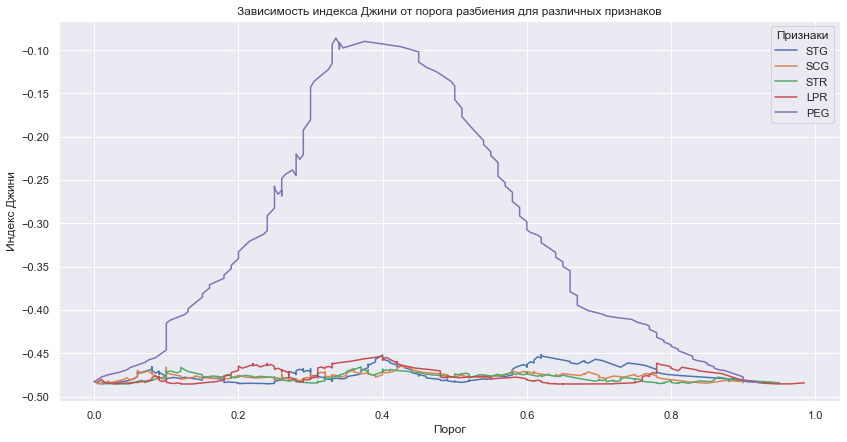

In [17]:
features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
y = np.array(df['UNS'])
plt.figure(figsize=(14, 7))

for feat in features:
    thresholds, ginis, threshold_best, gini_best = find_best_split(np.array(df[feat]), y)
    plt.plot(thresholds, ginis, label=feat)

plt.legend(title='Признаки')
plt.title('Зависимость индекса Джини от порога разбиения для различных признаков')
plt.xlabel('Порог')
plt.ylabel('Индекс Джини')

plt.show()


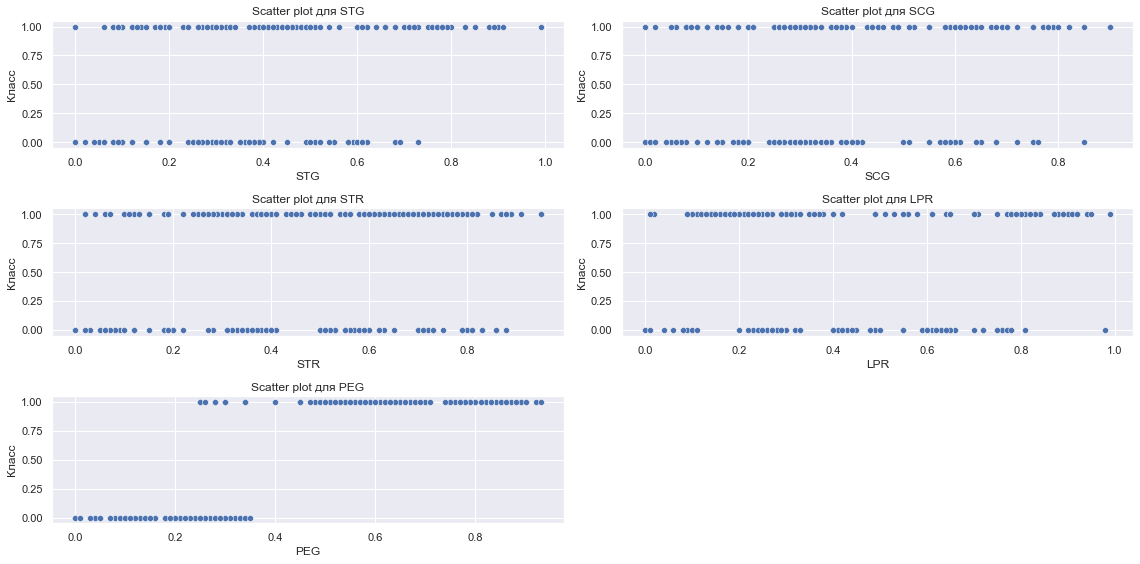

In [23]:
sns.set(rc={"figure.figsize":(16, 8)})
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[feature], y=y)
    plt.title(f'Scatter plot для {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Класс')

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По признаку PEG лучше всего производить деление выборки на два поддерева, так как по графику видно, что сначала идет рост, а потом снижение (то есть имеется заметный пик). Это также согласуется со scatter-графиками, там признак PEG сначала дает класс 0 до значения примерно 0.4, а далее класс 1. Кривая для хороших признаков должна иметь четкий пик, что будет отражать порог, при котором достигается хорошее разделение. Других кривые не будут содержать таких пиков или будут содержать какие-то локальные пики, где по ним не понятно какой порог лучше всего брать

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/56884/run-report/101969292/

Ник в контесте: tanigmatzyanov@edu.hse.ru

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [2]:
df = pd.read_csv('agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_new = df.apply(enc.fit_transform)
df_new.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [88]:
X, y = df_new.iloc[:, 1:], df_new.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [99]:
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score

X_tr_arr = np.array(X_train)
y_tr_arr = np.array(y_train)
y_test_arr = np.array(y_test)
X_test_arr = np.array(X_test)
feature_types = ['categorical'] * (df_new.shape[1] - 1)
dtc = DecisionTree(feature_types)
dtc.fit(X_tr_arr, y_tr_arr)
acc = accuracy_score(y_test_arr, dtc.predict(X_test_arr))
print(f'Accuracy: {acc}')


Accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [20]:
from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

ttt = pd.read_csv('tic-tac-toe.data')
enc = LabelEncoder()
ttt = ttt.apply(enc.fit_transform)
X, y  = ttt.iloc[:, :-1], ttt.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
max_depths = np.arange(1, 10)
mx_depths_acc = []
feature_types = ['categorical'] * (ttt.shape[1] - 1)

for max_depth in max_depths:
    dtc = DecisionTree(feature_types, max_depth = max_depth)
    dtc.fit(X_train, y_train)
    acc = accuracy_score(y_test, dtc.predict(X_test))
    mx_depths_acc.append(acc)


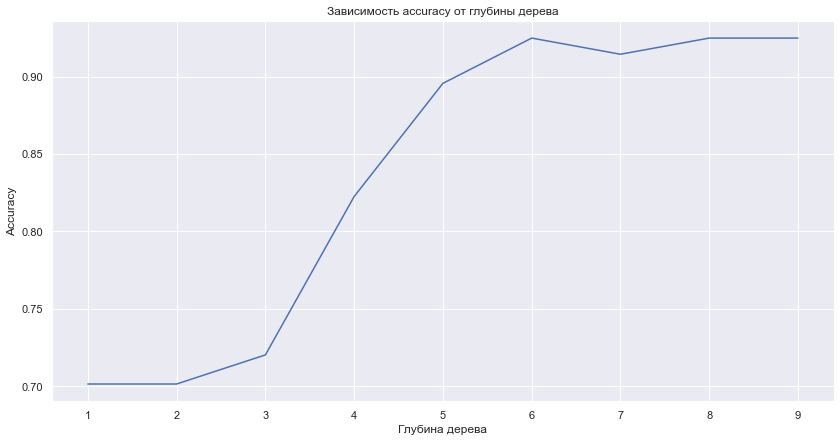

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(max_depths, mx_depths_acc)
plt.title('Зависимость accuracy от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Accuracy')
plt.show()


In [15]:
min_samples_split_all = np.arange(1, 300)
mn_s_split_acc = []

for min_samples_split in min_samples_split_all:
    dtc = DecisionTree(feature_types, min_samples_split = min_samples_split)
    dtc.fit(X_train, y_train)
    acc = accuracy_score(y_test, dtc.predict(X_test))
    mn_s_split_acc.append(acc)

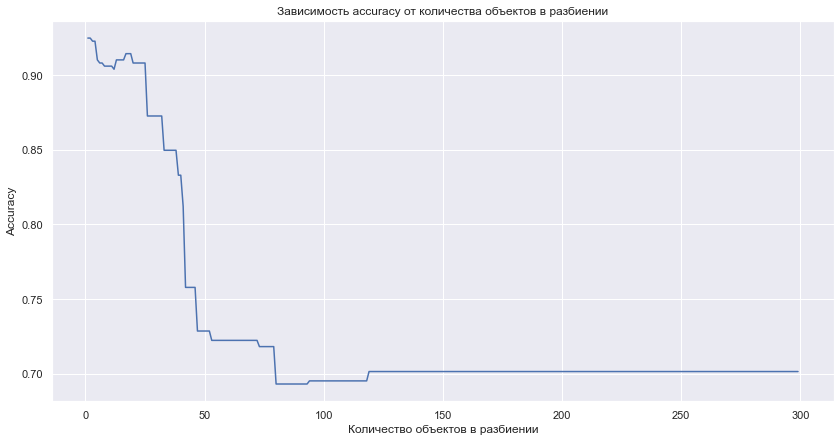

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(min_samples_split_all, mn_s_split_acc)
plt.title('Зависимость accuracy от количества объектов в разбиении')
plt.xlabel('Количество объектов в разбиении')
plt.ylabel('Accuracy')
plt.show()

In [22]:
min_samples_leaf_all = np.arange(1, 20)
mn_s_leaf_acc = []

for min_samples_leaf in min_samples_leaf_all:
    dtc = DecisionTree(feature_types, min_samples_leaf = min_samples_leaf)
    dtc.fit(X_train, y_train)
    acc = accuracy_score(y_test, dtc.predict(X_test))
    mn_s_leaf_acc.append(acc)

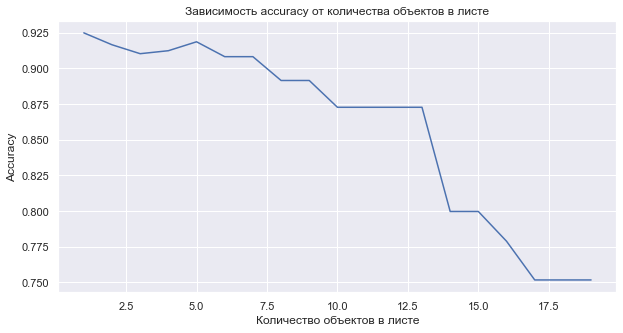

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_all, mn_s_leaf_acc)
plt.title('Зависимость accuracy от количества объектов в листе')
plt.xlabel('Количество объектов в листе')
plt.ylabel('Accuracy')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

1. Mushrooms

In [4]:
from sklearn.model_selection import cross_val_score
from hw5code import DecisionTree
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


In [53]:
# все вещественные
X, y = np.array(df_new.iloc[:, 1:]), np.array(df_new.iloc[:, 0])
feature_types = ['real'] * (df_new.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_real_mush = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_real_mush}')

Accuracy:0.9992610837438424


In [54]:
# все категориальные
X, y = np.array(df_new.iloc[:, 1:]), np.array(df_new.iloc[:, 0])
feature_types = ['categorical'] * (df_new.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_cat_mush = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_cat_mush}')

Accuracy:1.0


In [55]:
# ohe
from sklearn.preprocessing import OneHotEncoder
X, y = np.array(df_new.iloc[:, 1:]), np.array(df_new.iloc[:, 0])

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
dt = DecisionTree(feature_types)
acc_ohe_mush = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_ohe_mush}')

Accuracy:0.9996305418719211


In [56]:
# библиотечная

from sklearn.tree import DecisionTreeClassifier
X, y = np.array(df_new.iloc[:, 1:]), np.array(df_new.iloc[:, 0])

acc_dtc = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_dtc}')

Accuracy:0.957550942504499


2. tic-tac-toe 

In [57]:
# все вещественные
X, y = np.array(ttt.iloc[:, :-1]), np.array(ttt.iloc[:, -1])
feature_types = ['real'] * (df_new.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_real_ttt = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_real_ttt}')

Accuracy:0.4626973684210527


In [58]:
# все категориальные
feature_types = ['categorical'] * (df_new.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_cat_ttt = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_cat_ttt}')

Accuracy:0.549265350877193


In [59]:
# ohe
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
dt = DecisionTree(feature_types)
acc_ohe_ttt = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_ohe_ttt}')

Accuracy:0.5535197368421052


In [60]:
# библиотечная

from sklearn.tree import DecisionTreeClassifier
X, y = np.array(ttt.iloc[:, :-1]), np.array(ttt.iloc[:, -1])

acc_dtc_ttt = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_dtc_ttt}')

Accuracy:0.7913157894736842


3. Cars

In [72]:
cars = pd.read_csv('car.data')
cars['unacc'] = ((cars['unacc'] != 'acc') & (cars['unacc'] != 'unacc')).astype(np.uint8)

enc = LabelEncoder()
cars = cars.apply(enc.fit_transform)


In [73]:
# все вещественные
X, y = np.array(cars.iloc[:, :-1]), np.array(cars.iloc[:, -1])
feature_types = ['real'] * (cars.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_real_cars = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_real_cars}')

Accuracy:0.9425998118026616


In [74]:
# все категориальные
feature_types = ['categorical'] * (cars.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_cat_cars = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_cat_cars}')

Accuracy:0.9675191558005108


In [75]:
# ohe
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
dt = DecisionTree(feature_types)
acc_ohe_cars = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_ohe_cars}')

Accuracy:0.9217670385804544


In [76]:
# библиотечная

from sklearn.tree import DecisionTreeClassifier
X, y = np.array(cars.iloc[:, :-1]), np.array(cars.iloc[:, -1])

acc_dtc_cars = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_dtc_cars}')

Accuracy:0.9449522785320607


4. Nursery

In [78]:
nurs = pd.read_csv('nursery.data')
nurs['recommend'] = ((nurs['recommend'] != 'not_recom') & (nurs['recommend'] != 'recommend')).astype(np.uint8)

enc = LabelEncoder()
nurs = nurs.apply(enc.fit_transform)

In [79]:
# все вещественные
X, y = np.array(nurs.iloc[:, :-1]), np.array(nurs.iloc[:, -1])
feature_types = ['real'] * (nurs.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_real_nurs = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_real_nurs}')

Accuracy:0.9998456790123458


In [80]:
# все категориальные
feature_types = ['categorical'] * (nurs.shape[1] - 1)
dt = DecisionTree(feature_types)
acc_cat_nurs = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_cat_nurs}')

Accuracy:0.9999228395061728


In [81]:
# ohe
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
dt = DecisionTree(feature_types)
acc_ohe_nurs = np.mean(cross_val_score(dt, X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))

print(f'Accuracy:{acc_ohe_nurs}')

Accuracy:0.9997685185185186


In [82]:
# библиотечная

from sklearn.tree import DecisionTreeClassifier
X, y = np.array(nurs.iloc[:, :-1]), np.array(nurs.iloc[:, -1])

acc_dtc_nurs = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10,
                                        scoring = make_scorer(accuracy_score)))
print(f'Accuracy:{acc_dtc_nurs}')

Accuracy:0.9998456790123458


In [83]:
mush_arr = [acc_real_mush, acc_cat_mush, acc_ohe_mush, acc_dtc]
ttt_arr = [acc_real_ttt, acc_cat_ttt, acc_ohe_ttt, acc_dtc_ttt]
cars_arr = [acc_real_cars, acc_cat_cars, acc_ohe_cars, acc_dtc_cars]
nurs_arr = [acc_real_nurs, acc_cat_nurs, acc_ohe_nurs, acc_dtc_nurs]
table = {}
table['mushrooms'] = mush_arr
table['tic-tac-toe'] = ttt_arr
table['cars'] = cars_arr
table['nursery'] = nurs_arr
answer = pd.DataFrame.from_dict(table, orient='index', columns=['real', 'cat', 'real_ohe', 'sklearn'])
answer

,real,cat,real_ohe,sklearn
mushrooms,0.999261,1.000000,0.999631,0.957551
tic-tac-toe,0.462697,0.549265,0.553520,0.791316
cars,0.942600,0.967519,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** В целом можно сказать, что библиотечный классификатор показывает наиболее стабильные результаты. Сильна видна разница для датасета tic-tac-toe, скорее всего, мои алгоритмы переобучаются. Также скорее всего здесь зависимость более сложная, так как и библиотечный классификатор дал accuracy не самый лучший (на других датасетах лучше). Из моих алгоритмов лучший, когда мы считаем, что признаки категориальные, какими и они являются на самом деле. 

Теперь отранжируем по датасетам, где лучше всего отработали наши алгоритмы (от лучшего к худшему):
1. На датасете nursery все алгоритмы дали очень хорошую accuracy (все почти 1). 
2. На датасете mushrooms все алгоритмы тоже хорошую accuracy (все почти 1), но библиотечный дал accuracy =  0.957551, что по сравнению с другими похуже
3. На датасете cars все алгоритмы дали хорошую accuracy в среднем около 0.95
4. tic-tac-toe (тут не очень хорошо, уже описывал выше)


В результатах есть некая случайность, так как мы в кросс-валидации берем случайные подмножества. От проведения различных экспериментов можем получать небольшие отличия. Я думаю мы можем брать больше фолдов в разбиении, тем самым будем минимизировать эту случайность.

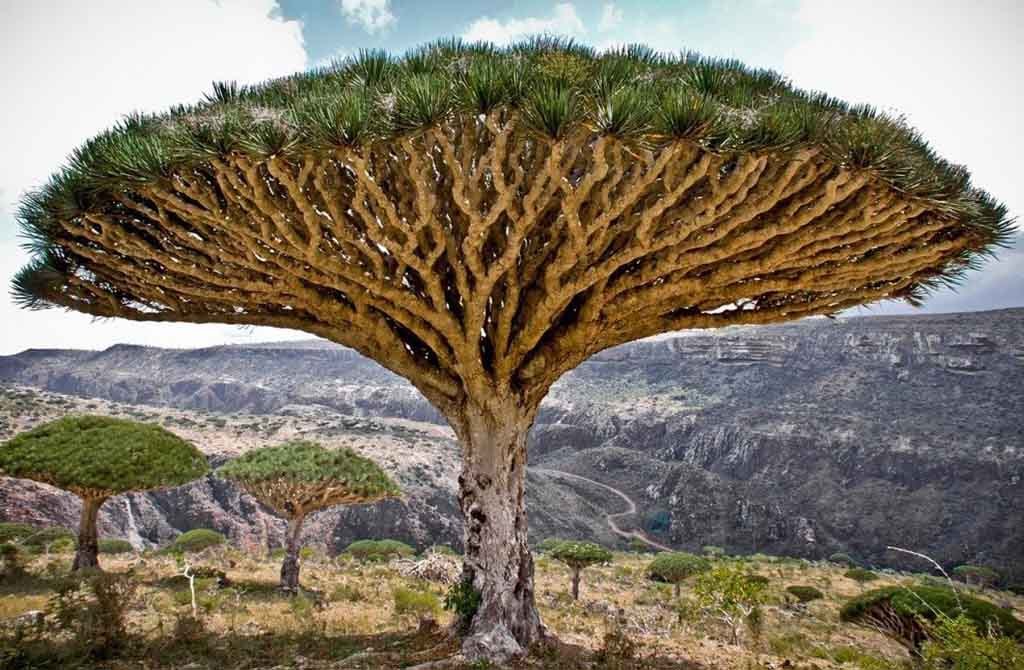